In [ ]:
!unzip /content/mergeAttackwithAttackFree.zip
!unzip /content/mergeIdwithAttackfree.zip

Archive:  /content/mergeAttackwithAttackFree.zip
  inflating: mergeAttackwithAttackFree.txt  
Archive:  /content/mergeIdwithAttackfree.zip
  inflating: mergeIdwithAttackfree.txt  


In [ ]:
import numpy as np


fileId = open('/content/mergeIdwithAttackfree.txt', 'r')
fileA = open('/content/mergeAttackwithAttackFree.txt','r')
detectList = []
counter = 1
graphList = []
ultimateGraphList = [] 
utlimateaDetectionList = []
graphCounter = 0


messageSize = 200

for line in fileId:
  node = line.split()[0]


  graphList.append(node)
  

  if len(graphList) == messageSize: 
    ultimateGraphList.append(graphList)


    
  
   

    graphList = []
   
   

ugl = ultimateGraphList

for line in fileA:
  attackChecking = line.split()[0]


  detectList.append(attackChecking)
  

  if len(detectList) == messageSize: 
    utlimateaDetectionList.append(detectList)


    detectList = []

udl = utlimateaDetectionList


print(len(ugl))
print(len(udl))

print(ugl[0])
print(len(ugl[0]))
print(len(udl[0]))
print(udl[0])
print(udl[3])

82497
82497
['04b0', '05a0', '05a0', '02a0', '0260', '0080', '0081', '0165', '018f', '02b0', '0153', '0220', '0316', '0329', '0545', '043f', '0370', '0440', '0164', '04b1', '0316', '018f', '0260', '0080', '0081', '0165', '02a0', '02b0', '0329', '0153', '01f1', '0220', '0382', '0350', '04f2', '0545', '00a0', '00a1', '0370', '043f', '0440', '04f0', '05a2', '04f1', '05a2', '051a', '0690', '04b0', '0316', '018f', '0080', '0081', '0153', '0153', '0165', '0153', '0220', '0260', '02a0', '02b0', '0329', '0545', '043f', '0370', '0440', '0587', '05a0', '04b1', '0164', '0316', '0260', '02a0', '0080', '0081', '0164', '0165', '0153', '018f', '01f1', '0220', '02b0', '02c0', '0329', '0350', '0370', '0120', '0382', '0164', '043f', '0440', '04f2', '0517', '04f0', '0545', '05a2', '04b0', '0316', '0260', '018f', '0080', '0081', '0165', '0153', '01f1', '0220', '01f1', '02a0', '02b0', '0329', '0545', '043f', '0370', '0440', '0510', '04b1', '0164', '05e4', '0165', '02b0', '0080', '0081', '0153', '018f', '01

In [ ]:
#Making graph from the 200 sequential of id and store them in a file as Graph adjacent list
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random

gAttackfree=nx.DiGraph()
gAttacked = nx.DiGraph()

lenugl = len(ugl)

fileW = open("mixedGraph.txt","w")

counter = 0
gAttackfreeCounter = 0
gAttackedCounter = 0

isNotDone1 = True
isNotDone2 = True 
gAttackfree=nx.DiGraph()
gAttacked = nx.DiGraph()

for i in range(0,lenugl):
  fileW.write("Graph No: "+str(i+1))
  fileW.write("\n")
  dicGraph = defaultdict(list)
  attackFree = True

  

  for j in range (0, len(ugl[i])-1):
    dicGraph[str(ugl[i][j])].append((ugl[i][j+1]))

  for j in range (0,len(udl[i])):
    if str(udl[i][j]) == 'T': 
      attackFree = False
      break
    


  

  
  fileW.write("Attack Free: "+str(attackFree)+"\n")

  for key, val in dicGraph.items():
    fileW.write(str(key) + (" ---> "))
    for m in range(0, len(val)):
      fileW.write(val[m]+"\t")
    fileW.write("\n")


print(counter)
print(gAttackfreeCounter)
print(gAttackedCounter)

fileW.close()

#print(len(list(gAttackfree)))


0
0
0


In [ ]:
#Getting all the features

import networkx as nx
import hashlib
import numpy as np

#Function for tracing the attacked and attackfree graph. Return a list which 
#contation the info that a graph is attacked or attack
def getAttackFreelist(filename):
  attacFreekList = []
  file_ = open(filename, 'r')


  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:5]
    
      if graph_number == "Graph":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        attacFreekList.append(line.split())

  
  file_.close()
  print(len(attacFreekList))
  print(attacFreekList)
  return attacFreekList


def getFeatures(filename):

  attackFreeList = getAttackFreelist(filename)
  file_ = open(filename, 'r')

  graphList = []
  ultimate_graphList = []  
  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:5]
    
      if graph_number == "Graph":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        line = file_.readline()

        if graphCounter >= 2:
          ultimate_graphList.append(graphList)
          graphList = []


    
      list1 = line.split()
      graphList.append(list1)



  ultimate_graphList.append(graphList)
    
  file_.close()

  list_All_Feature_Set = []
 
  filetowrite = filename[:-4]+"_kde_figures.txt"
  file1 = open(filetowrite,'w')

  graphNumber = len(ultimate_graphList)
# Iterating every graph
  for i in range(0,graphNumber):

    G = nx.DiGraph()
    graphEdgeNumber = len(ultimate_graphList[i])
     # defining variable for detecting max pagerank
  #making the graph
    indegree = 0
    outdegree = 0
    
    for j in range(0,graphEdgeNumber):
      vertexConnectionLength = len(ultimate_graphList[i][j])

      for k in range(2,vertexConnectionLength):
      
      
        G.add_edge(ultimate_graphList[i][j][0],ultimate_graphList[i][j][k])
    

    weighted_Feature_Set = nx.pagerank(G)
    
    edge = G.number_of_edges()
    node = G.number_of_nodes()

    
    temp_list = list(weighted_Feature_Set.values())
    median_pagerank_vertices = np.median(temp_list)
    maximum_pagerank_vertex = np.max(temp_list)
    minimum_pagerank_vertex = np.min(temp_list)
    std_pagerank = np.std(temp_list)
    varpagerank = np.var(temp_list)


    if i == 0:
      file1.write("No."+"\t"+"Nodes\t"+"Edges\t"+"Maximum Indegree\t"+"Minimum Indegree\t"+"Maximum Outdegree\t"+
                  "Minimum Outdegree\t"+	
                  "Median PageRank\t"+"Maximum PageRank\t"+"Mininum PageRank\t"+"Std PageRank\t"+
                  "Var PageRank\t"+"Attacked\n")

    file1.write(str(i+1)+"\t")
    counter = 0
    in_deg = []
    out_deg = []
    for key,val in weighted_Feature_Set.items():
      in_deg.append(G.in_degree(key))
      out_deg.append(G.out_degree(key))
    
    maxInd = np.max(in_deg)
    minInd = np.min(in_deg)
    maxOut = np.max(out_deg)
    minOut = np.min(out_deg)
    file1.write(str(node)+"\t") 
    file1.write(str(edge)+"\t")
    file1.write(str(maxInd)+str("\t")+str(minInd)+str("\t"))
    file1.write(str(maxOut)+str("\t")+str(minOut)+str("\t"))
    
    file1.write(str(median_pagerank_vertices)+str("\t")+str(maximum_pagerank_vertex))
    value = 0
    if attackFreeList[i][2] == 'False':
      value = 1
    else:
      value = 0
    file1.write(str("\t")+str(minimum_pagerank_vertex)+str("\t")+str(std_pagerank)+"\t"+
                str(varpagerank)+"\t"+
                str(value)+"\n")

  


  file1.close()
getFeatures('/content/mixedGraph.txt')



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Applying the GNB and getting the accuracy and confusion matrix

import seaborn as sn
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# load dataset
dataframe = pandas.read_table('/content/mixedGraph_GraphFeajjjjjtures.txt')
data = dataframe.drop("No.", axis=1)
data = data.drop("StdPageRank", axis=1)
data = data.drop("VarPageRank", axis=1)
dataset = data.values

#print(data.corr())

# split into input (X) and output (Y) variables


l = len(ugl)
X = dataset[:,0:]
# print(X.shape)
labels = []
for i in range (0,l):
  if X[i][9] == True:
    labels.append(0)
  else:
    labels.append(1)
    

features = X[0:l,0:9]
print("Attacked------"+str(labels.count(1)))
print("Attackfree----->"+str(labels.count(0)))

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
gnb = GaussianNB()

  # Train our classifier
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)

print(test_labels.count(1))
print(test_labels.count(0))

  
  # Evaluate accurac
print(accuracy_score(test_labels, preds))

cm = confusion_matrix(test_labels, preds)

cm = cm.T

print(cm)



Attacked------58834
Attackfree----->23663
19530
7695
0.9619834710743802
[[ 7654   994]
 [   41 18536]]


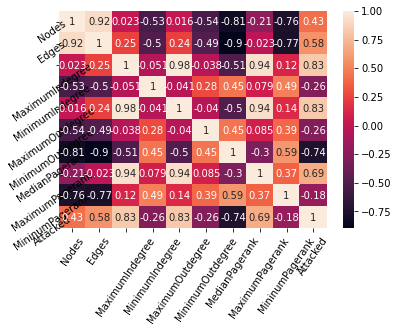

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# load dataset
dataframe = pandas.read_table('/content/mixedGraph_GraphFeajjjjjtures.txt')
data = dataframe.drop("No.", axis=1)
data = data.drop("StdPageRank", axis=1)
data = data.drop("VarPageRank", axis=1)
dataset = data.values

corrMatrix = data.corr()

sn.heatmap(corrMatrix, annot = True, fmt = '.2g')
plt.xticks(rotation=55,ha = 'center')
plt.yticks(rotation = 35,ha = 'center')
plt.show()

In [ ]:
# cm = [[18536, 41],
# [ 994 ,7654]]


tp = cm[0][0]
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]

re = tp/(tp+fn)
pr = tp/(tp+fp)
f1 = 2*pr*re/(pr+re)
fpr = fp / (fp+tn)
print("pr.........."+str(pr))
print("re----"+str(re))

print("f1===="+str(f1))
print("fpr====="+ str(fpr))
print((tp+tn)/(tp+tn+fp+fn))

pr..........0.9359430604982206
re----0.9432157800358637
f1====0.9395653468294134
fpr=====0.10285714285714286
0.9254498714652957


In [ ]:
15264
39185
0.9441679369685394
[[36271   126]
 [ 2914 15138]]
 100

3300
7590
0.9639118457300275
[[7228   31]
 [ 362 3269]]
500


1805
3640
0.9564738292011019
[[3443   40]
 [ 197 1765]]
1000

Attacked------3199
Attackfree----->5050
1050
1673
0.9254498714652957
[[1578  108]
 [  95  942]]
2k


594
495
0.6629935720844812
[[459 331]
 [ 36 263]]
5000

317
228
0.8422018348623853
[[213  71]
 [ 15 246]]
 10000





145813
398670
0.9061825621736583
[[387602  40014]
 [ 11068 105799]]
 10


269474
819491
0.8833121358354034
[[811755 119333]
 [  7736 150141]]
 5

[11.5, 23, 57.5, 115, 230]


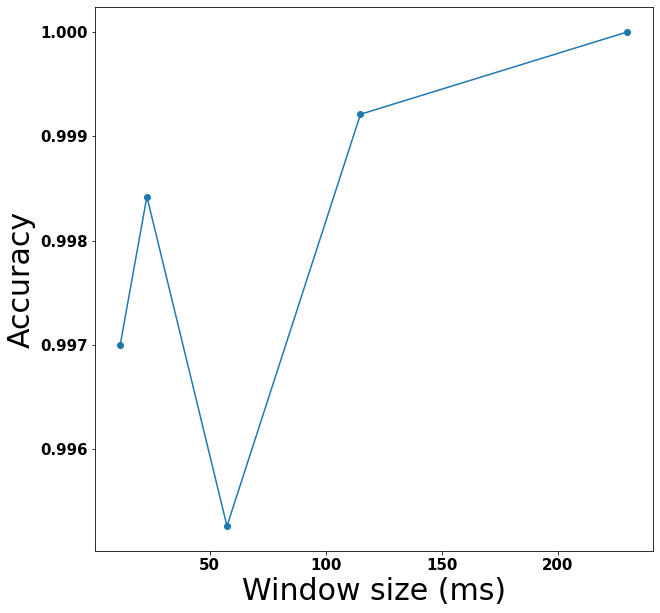

In [ ]:
import matplotlib.pyplot as plt


fuzzyList = [
0.9970005525,
0.998421468,
0.9952644041,
0.999210734,
1
]


spoofingList = [
0.9975740886,
0.9959349593,
0.9914782039,
0.9895081967,
0.9829619921               
]

dosList =[
0.9962800694,
0.9933873367,
0.9938016529,
0.9917355372,
0.9917355372        
]

mixedList =[
0.944167937,
0.9619834711,
0.9639118457,
0.9564738292,
0.9254498715
]

replayList=[
0.881097561,
0.8842849224,
0.8732248008,
0.870498615,
0.8850415512
]

xList =[11.5,
23,
57.5,
115,
230]

print(xList)
#print(yList)
plt.rcParams["font.weight"] = "bold"

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 10)

# plt.plot(xList,spoofingList,marker='o',label='Spoofing attack')
plt.plot(xList,fuzzyList,marker='o',label = 'Fuzzy attack')
#plt.plot(xList,dosList,marker='o',label = 'Dos attack')
#plt.plot(xList,mixedList,marker='o',label = 'Mixed attack')
#plt.plot(xList,replayList,marker='o',label = 'Replay attack')

#plt.legend(bbox_to_anchor=(0, 1.12), ncol = 3, loc='upper left',fontsize = 15)

plt.ylabel('Accuracy', fontsize=30)
plt.xlabel('Window size (ms)',fontsize=30)
plt.tick_params(labelsize=15)


plt.savefig('fuzzyAttacks.svg', bbox_inches = "tight")
plt.savefig('fuzzyAttacks.png', bbox_inches = "tight")
plt.savefig('fuzzyAttacks.pdf', bbox_inches = "tight")

In [ ]:
#Applying the GNB and getting the accuracy and confusion matrix

import seaborn as sn
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# load dataset
dataframe = pandas.read_table('/content/mixedGraph_GraphFeatures_200.txt')
data = dataframe.drop("No.", axis=1)
data = data.drop("StdPageRank", axis=1)
data = data.drop("VarPageRank", axis=1)

dataset = data.values



# split into input (X) and output (Y) variables


l = len(dataframe)
X = dataset[:,0:]

print(X.shape)
labels = []
for i in range (0,l):
  if X[i][9] == 'R':
    labels.append(0)
  else:
    labels.append(1)

features = X[0:l,0:9]
print("No of total Attacked graphs------"+str(labels.count(1)))
print("No of total Attackfree graphs----->"+str(labels.count(0)))

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
gnb = LinearDiscriminantAnalysis()

  # Train our classifier
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)

print("No of Attacked graphs- in test-----"+str(test_labels.count(1)))
print("No of Attackfree graphs--in test--->"+str(test_labels.count(0)))


  
  # Evaluate accurac
print(accuracy_score(test_labels, preds))

cm = confusion_matrix(test_labels, preds)

cm = cm.T

print(cm)



(82497, 10)
No of total Attacked graphs------23663
No of total Attackfree graphs----->58834
No of Attacked graphs- in test-----7695
No of Attackfree graphs--in test--->19530
0.9846464646464647
[[19517   405]
 [   13  7290]]
